## **Ödevi Yapanlar**

Tuba SARIKAYA - 22060374

Zeynep Ravza DURSUN - 22060385

# **UrbanSound8K Ses Verisi Üzerinde Sınıflandırma Ödevi**

## **Gerekli Kütüphanelerin İçe Aktarılması**

In [21]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import time
import pandas as pd
import seaborn as sns
from IPython.display import Audio
from google.colab import files
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Audio
from collections import Counter
from sklearn.model_selection import StratifiedKFold

## **Soru 1 : Ses Dosyasını Yükleme ve Özelliklerini İnceleme**

Bu bölümde UrbanSound8K veri setinden bir ses dosyası yüklenerek teknik
özellikleri (kanal sayısı, örnekleme oranı, süre) belirlenmektedir.
Librosa kütüphanesi ile ses verisi numpy dizisine dönüştürülmekte ve
data ile sr değişkenlerinin veri yapıları (type, shape) analiz edilmektedir.
Elde edilen çıktılar yorumlanarak ses verisinin sayısal temsili ve makine
öğrenmesi süreçlerinde nasıl kullanılacağı açıklanmaktadır.

In [ ]:
# Ses dosyasının Google Colab ortamına yüklenmesi
uploaded = files.upload()
file_name = next(iter(uploaded))
print(f"Yüklenen dosya: {file_name}")

Saving 14470-2-0-21.wav to 14470-2-0-21.wav
Yüklenen dosya: 14470-2-0-21.wav


In [ ]:
"""
librosa.load() fonksiyonu ile ses dosyası okunur. Bu fonksiyon iki değer döndürür:
- data: Ses sinyalinin zaman alanındaki genlik değerlerini içeren numpy dizisi
- sr: Örnekleme oranı (sample rate) - saniyede kaç örnek alındığını gösterir (Hz)

mono=True parametresi, stereo ses dosyalarını otomatik olarak mono'ya dönüştürür.
Bu sayede kanal sayısı tek boyutlu hale gelir ve işlemler kolaylaşır.
"""
data, sr = librosa.load(file_name, sr=None)

"""
Ses dosyasının temel özelliklerini hesaplıyoruz:
- Kanal sayısı: Mono (1) veya Stereo (2)
- Örnekleme oranı: Ses sinyalinin saniyedeki örnek sayısı
- Süre: Toplam örnek sayısının örnekleme oranına bölünmesiyle bulunur
- Toplam örnek sayısı: data dizisinin uzunluğu
"""

# Kanal sayısının belirlenmesi
if data.ndim == 1:
    num_channels = 1
else:
    num_channels = data.shape[0]

# Ses dosyasının süresinin hesaplanması
duration = librosa.get_duration(y=data, sr=sr)

# Teknik özelliklerin ekrana yazdırılması
print("--- Ses Dosyasının Teknik Özellikleri ---")
print(f"Kanal Sayısı: {num_channels}")
print(f"Örnekleme Oranı (sr): {sr} Hz")
print(f"Süre: {duration:.2f} saniye")
print(f"Toplam Örnek (Sample) Sayısı: {len(data)}")

# VERİ YAPISININ İNCELENMESİ
print("\n--- Değişken Türü ve Şekli ---")
print(f"data değişkeninin türü: {type(data)}")
print(f"data değişkeninin şekli (shape): {data.shape}")
print(f"sr değişkeninin türü: {type(sr)}")

--- Ses Dosyasının Teknik Özellikleri ---
Kanal Sayısı: 1
Örnekleme Oranı (sr): 44100 Hz
Süre: 4.00 saniye
Toplam Örnek (Sample) Sayısı: 176400

--- Değişken Türü ve Şekli ---
data değişkeninin türü: <class 'numpy.ndarray'>
data değişkeninin şekli (shape): (176400,)
sr değişkeninin türü: <class 'int'>


### **Sonuçların Yorumlanması**

Elde edilen çıktılara göre, kullanılan veri zaman serisi formatında bir ses sinyalidir.
'data' değişkeni numpy.ndarray türünde tek boyutlu bir dizi olup, her bir elemanı
zaman ekseninde sıralı olarak dizilmiş genlik değerlerini içermektedir. Bu yapı,
ses sinyalinin örnekleme teoremi çerçevesinde sayısallaştırılmış halidir.

Örnekleme oranı (sr) tam sayı türünde olup, saniyede kaç örnek alındığını Hz cinsinden
belirtir. Örneğin 22050 Hz örnekleme oranı, her saniyede 22050 adet genlik değerinin
ölçüldüğü anlamına gelir. 'data' dizisinin uzunluğu (shape) örnekleme oranı ile
birlikte değerlendirildiğinde, ses kaydının toplam süresini vermektedir.

Özetle, bu veri yapısı zaman alanında temsil edilen bir boyutlu sinyal niteliğindedir.
Değerler genellikle -1 ile +1 arasında normalize edilmiş float türündedir. Bu format,
ses işleme ve makine öğrenmesi algoritmalarında doğrudan kullanılabilir bir yapıdadır.

## **Soru 2 : Zaman-Genlik (Waveform) Grafiği ve Sesin Birlikte İncelenmesi**

Bu bölümde, yüklenen ses dosyasının zaman-genlik grafiği (waveform) görselleştirilmekte
ve ses dosyası çalınmaktadır. Amaç, ses dalgasının görsel temsili ile işitsel algı arasındaki
ilişkiyi incelemek ve dalga formundaki tepe noktaları, sessiz ve yoğun bölgeleri yorumlamaktır.

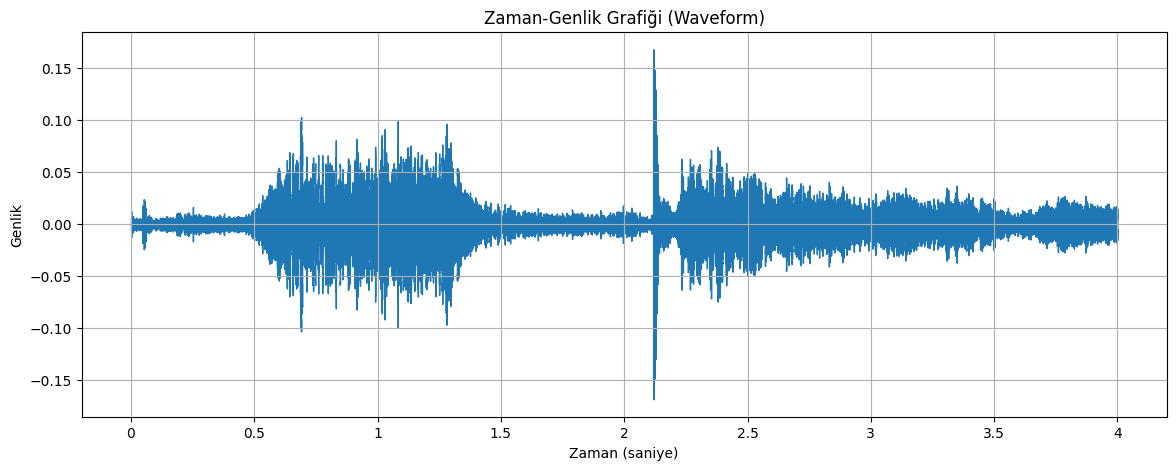

In [ ]:
# ZAMAN-GENLİK GRAFİĞİNİN GÖRSELLEŞTİRİLMESİ

"""
Waveform grafiği, ses sinyalinin zaman eksenindeki genlik değişimlerini gösterir.
X ekseni zamanı (saniye), Y ekseni ise genlik değerlerini temsil eder.
librosa.display.waveshow() fonksiyonu, ses verisini görselleştirmek için optimize edilmiştir.
"""

# Grafik boyutunun ayarlanması.
plt.figure(figsize=(14, 5))

# Zaman-genlik grafiğinin (waveform) çizilmesi.
# x ekseni zaman (saniye), y ekseni genliktir.
librosa.display.waveshow(data, sr=sr)

# Grafik başlıklarının ve etiketlerinin belirlenmesi.
plt.title('Zaman-Genlik Grafiği (Waveform)')
plt.xlabel('Zaman (saniye)')
plt.ylabel('Genlik')
plt.grid(True)
plt.show()

# Ses dosyasını Colab ortamında çalmak için Audio nesnesinin oluşturulması.
Audio(data, rate=sr)

### **Waveform Grafiğinin Yorumlanması**

**Sessiz Bölgeler (0-0.5s ve 1.5-2.0s)**

İlk yarım saniye ve 1.5-2.0 saniye aralığında genlik değerleri neredeyse sıfıra yakın seyrediyor. Bu kısımlar muhtemelen kayıt başlamadan önceki sessizliği veya ses olayları arasındaki boşlukları gösteriyor. Dinlediğimizde de bu bölgelerde herhangi bir belirgin ses duyulmuyor.

**0.5-1.3 Saniye Arası**

Bu bölgede genlik artışı başlıyor ve yaklaşık 0.8 saniye boyunca devam ediyor. Dalga deseni oldukça yoğun ve kararlı bir yapıda. Ani bir ses değil, belirli bir süre devam eden bir ses kaynağı olduğu anlaşılıyor. Ses dinlendiğinde de bu süreklilik açıkça fark ediliyor.

**2.1 Saniye Civarındaki Tepe Noktası**

Grafikteki en dikkat çekici nokta burası. Genlik aniden maksimum seviyeye çıkıyor ve hemen sönümleniyor. Bu tür keskin tepe noktaları genellikle ani darbe şeklindeki seslere işaret ediyor - bir çarpma, patlama veya benzer anlık bir olay olabilir. Tüm kayıt boyunca en yüksek genlik değeri burada ölçülüyor.

**2.2-4.0 Saniye Arası**

Keskin tepenin hemen ardından yine yoğun bir dalga deseni var ama bu sefer genlik giderek azalıyor. Sanki bir sesin yankısı veya sönümlenme süreci gibi. İlk olaya göre biraz daha düzensiz bir yapısı var.

**Genel Yorum**

Grafikte en az üç farklı ses karakteri var: sürekli bir ses, ani bir darbe ve sönümlenen bir olay. Görsel olarak genlik ne kadar yüksekse sesin o kadar güçlü olduğunu, düşük olduğu yerlerde ise sessizlik veya çok hafif gürültü bulunduğunu görüyoruz. Özellikle 2.1 saniyedeki ani sıçrama hem grafikte hem de dinlerken çok net fark ediliyor.

## **Soru 3 : Farklı Sınıflardan Seslerin Zaman-Frekans Görselleri**

Bu bölümde UrbanSound8K veri setinden farklı sınıflara ait ses dosyaları seçilerek
zaman-frekans grafikleri (spektrogram) çizdirilmektedir. Amaç, farklı seslerin enerji
dağılımlarını karşılaştırmak ve görsel olarak ayırt edilebilir özellikleri incelemektir.

Saving İnsan.wav to İnsan.wav
Saving Köpek.wav to Köpek.wav
Saving Matkap.wav to Matkap.wav
Saving Siren + Köpek.wav to Siren + Köpek.wav
Yükleme tamamlandı. Yüklenen dosyalar: ['İnsan.wav', 'Köpek.wav', 'Matkap.wav', 'Siren + Köpek.wav']

--- İşlenen Dosya: İnsan.wav ---


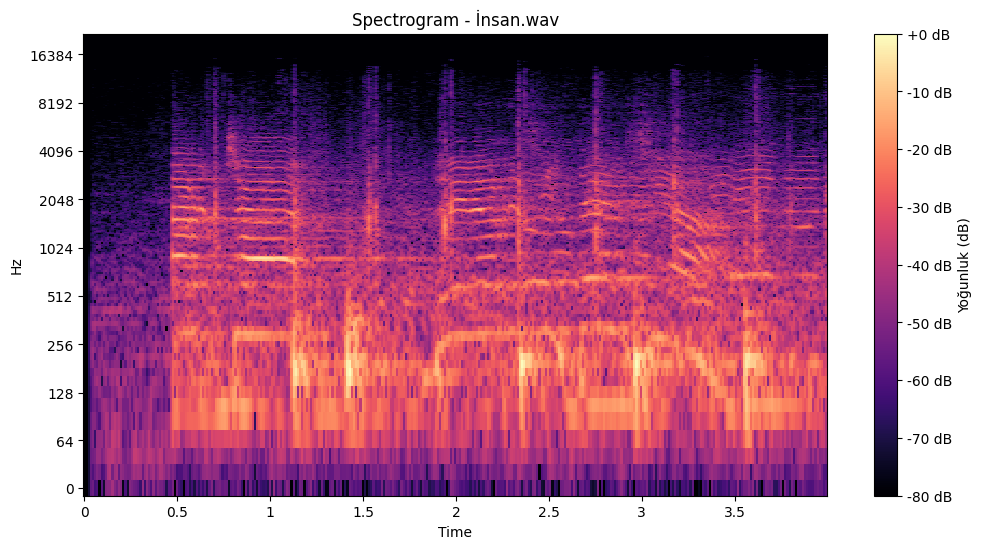

Dinlenen Ses: İnsan.wav


--------------------------------------------------

--- İşlenen Dosya: Köpek.wav ---


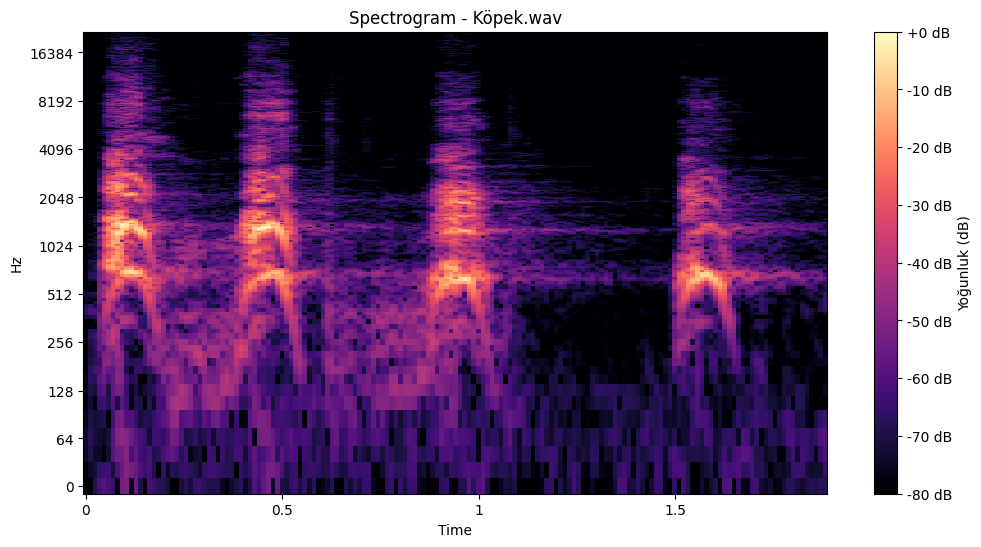

Dinlenen Ses: Köpek.wav


--------------------------------------------------

--- İşlenen Dosya: Matkap.wav ---


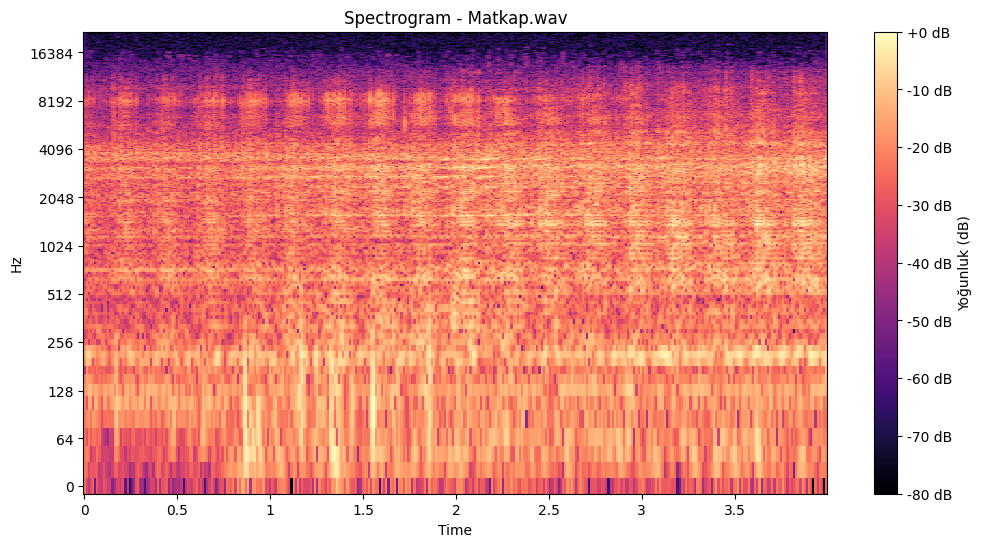

Dinlenen Ses: Matkap.wav


--------------------------------------------------

--- İşlenen Dosya: Siren + Köpek.wav ---


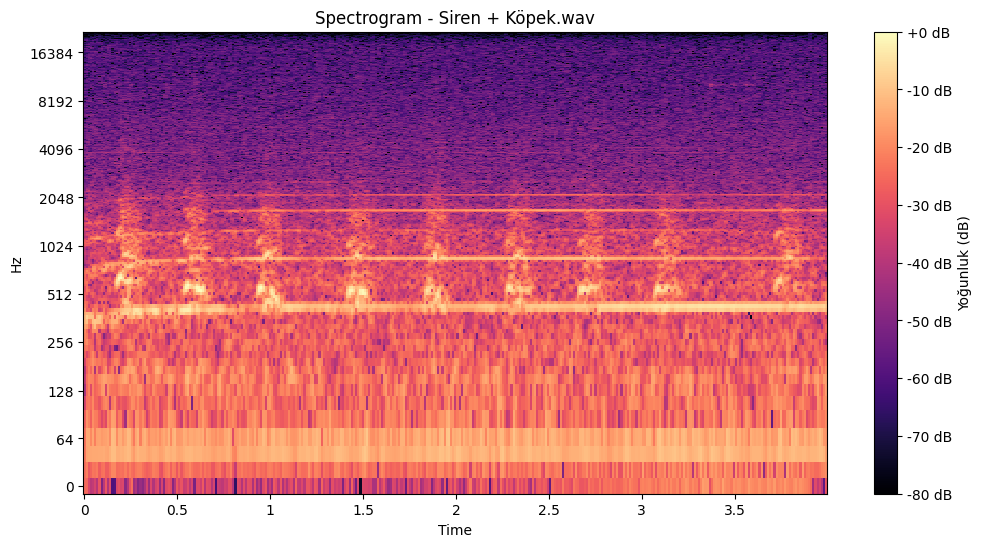

Dinlenen Ses: Siren + Köpek.wav


--------------------------------------------------


In [ ]:
# Ses dosyalarının yüklenmesi
uploaded = files.upload()

file_names = list(uploaded.keys())
print(f"Yükleme tamamlandı. Yüklenen dosyalar: {file_names}")

# SPEKTROGRAM HESAPLAMA VE GÖRSELLEŞTİRME

"""
Spektrogram, ses sinyalinin zaman-frekans düzlemindeki temsilini gösterir.
STFT (Short-Time Fourier Transform) ile hesaplanır ve dB cinsinden gösterilir.
- X ekseni: Zaman
- Y ekseni: Frekans (log ölçekte)
- Renk yoğunluğu: Enerji seviyesi (dB)
"""

for file_name in file_names:
    print(f"\n--- İşlenen Dosya: {file_name} ---")

    # Ses dosyasının yüklenmesi
    data, sr = librosa.load(file_name, sr=None)

    # STFT (Kısa Zamanlı Fourier Dönüşümü) hesaplanması
    stft_data = librosa.stft(data)

    # Spektrogramın dB cinsinden hesaplanması
    spectrogram_db = librosa.amplitude_to_db(np.abs(stft_data), ref=np.max)

    # Spektrogramın görselleştirilmesi
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB', label='Yoğunluk (dB)')
    plt.title(f'Spectrogram - {file_name}')
    plt.show()

    # Ses dosyasının çalınması
    print(f"Dinlenen Ses: {file_name}")
    display(Audio(data, rate=sr))
    print("-" * 50)

### **Spektrogram Analizi ve Karşılaştırma**

**İnsan Konuşması (İnsan.wav)**

Enerji 256-4096 Hz arasında yoğunlaşmış. Yatay turuncu bantlar formant yapılarını gösteriyor. 0.5-1.5 saniye arası özellikle yoğun, her hece farklı desen oluşturmuş. Konuşma dinamik yapısı zamanla sürekli değişen desenlerden belli oluyor.

**Köpek Havlaması (Köpek.wav)**

3-4 tane net havlama var, her biri dikey parlak sütun şeklinde. 0-4096 Hz arası geniş bir alana yayılmış ama düşük frekanslarda daha yoğun. Havlamalar arası tamamen sessiz (siyah). Bu darbeli ve geniş bantlı yapı çok karakteristik.

**Matkap Sesi (Matkap.wav)**

8192 Hz civarında periyodik tekrarlanan noktalar dikkat çekiyor. Enerji 2048-8192 Hz arası çok yoğun. Zaman boyunca neredeyse hiç değişmemiş, sürekli bir gürültü. Düşük frekanslarda da enerji var ama daha homojen dağılmış.

**Siren + Köpek (Siren + Köpek.wav)**

64-512 Hz arasında çok parlak yatay bant sirenin temel frekansı. 1024-2048 Hz'de harmonikler var. Siren tüm kayıt boyunca sürekli devam ederken, belirli noktalarda (başta ve 1-1.5 saniye arası) köpek havlamalarından gelen dikey yapılar görülüyor. İki sesin karışımı net bir şekilde ayırt edilebiliyor.

**Karşılaştırma**

**Zamansal olarak:** Matkap ve siren sürekli, insan konuşması dinamik, köpek kesik kesik.

**Frekans olarak:** Köpek tüm bandı kapsıyor, siren dar bantlarda, insan orta frekanslarda, matkap yüksek frekanslarda yoğun.

**Görsel olarak:** Sirenin yatay çizgileri, köpeğin dikey sütunları, konuşmanın değişken bantları ve matkabın homojen dokusu birbirinden tamamen farklı.

## **Soru 4 : Ham Ses Verisinin Sınıflandırılması**

Bu bölümde UrbanSound8K veri setindeki tüm ses dosyaları herhangi bir özellik çıkarımı
yapılmadan doğrudan sınıflandırılmaktadır. Amaç, ham ses verisinin tek başına ne kadar
ayırt edici olduğunu görmek ve düşük örnekleme oranının etkisini gözlemlemektir.

### **Adım 1: Veri Setinin Yüklenmesi**

In [2]:
# Google Drive bağlantısının yapılması
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Zip dosyasının yolu
zip_path = '/content/drive/My Drive/Makine Öğrenmesi Ödevi/archive.zip' # Senin yolun zaten doğru görünüyor
extract_path = '/content/urbansound8k'

# Zip dosyasının çıkartılması
if not os.path.exists(extract_path):
    os.makedirs(extract_path) # Hedef klasörü oluştur
    print("Zip dosyası çıkartılıyor...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Tüm içeriği doğrudan extract_path içine çıkart
        zip_ref.extractall(extract_path)
    print("Çıkartma işlemi tamamlandı.")

Mounted at /content/drive
Zip dosyası çıkartılıyor...
Çıkartma işlemi tamamlandı.


### **Adım 2: Ses Dosyalarının Okunması ve Ön İşleme**

In [ ]:
"""
Tüm ses dosyaları sr=45 Hz ile yüklenir. Bu çok düşük örnekleme oranı,
Nyquist-Shannon teoremine göre 22.5 Hz üzerindeki tüm frekansları kaybettirir.
Farklı uzunluktaki sesler zero-padding ile aynı boyuta getirilir.
"""

metadata_path = os.path.join(extract_path, 'UrbanSound8K.csv')
metadata = pd.read_csv(metadata_path)

features = []
labels = []
max_pad_len = 0

print("Ses dosyaları yükleniyor ve işleniyor...")
for index, row in tqdm(metadata.iterrows(), total=len(metadata)):

    file_path = os.path.join(extract_path, 'fold' + str(row['fold']), row['slice_file_name'])

    # Ham ses verisinin sr=45 ile yüklenmesi
    data, sr = librosa.load(file_path, sr=45)

    if len(data) > max_pad_len:
        max_pad_len = len(data)

    features.append(data)
    labels.append(row['classID'])

print(f"\nEn uzun ses dosyasının örnek sayısı: {max_pad_len}")

# Zero-padding uygulanması
print("Zero-padding uygulanıyor...")
padded_features = []
for data in tqdm(features):
    pad_width = max_pad_len - len(data)
    padded_data = np.pad(data, (0, pad_width), mode='constant')
    padded_features.append(padded_data)

X = np.array(padded_features)
y = np.array(labels)

print("\nVeri Yükleme ve Ön İşleme Tamamlandı!")
print("Özellik matrisi (X) şekli:", X.shape)
print("Etiket vektörü (y) şekli:", y.shape)

Ses dosyaları yükleniyor ve işleniyor...


100%|██████████| 8732/8732 [05:19<00:00, 27.37it/s]



En uzun ses dosyasının örnek sayısı: 182
Zero-padding uygulanıyor...


100%|██████████| 8732/8732 [00:00<00:00, 55049.85it/s]


Veri Yükleme ve Ön İşleme Tamamlandı!
Özellik matrisi (X) şekli: (8732, 182)
Etiket vektörü (y) şekli: (8732,)


### **Adım 3: Model Eğitimi ve Değerlendirme**

Eğitim verisi (X_train): (6985, 182)
Test verisi (X_test): (1747, 182)

Random Forest modeli eğitiliyor... (Bu işlem birkaç dakika sürebilir)
Model eğitimi tamamlandı.

Model Doğruluğu (Accuracy): 31.25%

--- Sınıflandırma Raporu ---
                  precision    recall  f1-score   support

 air_conditioner       0.37      0.45      0.41       200
        car_horn       0.52      0.15      0.23        86
children_playing       0.21      0.18      0.19       200
        dog_bark       0.32      0.26      0.28       200
        drilling       0.24      0.27      0.25       200
   engine_idling       0.29      0.35      0.32       200
        gun_shot       0.65      0.83      0.73        75
      jackhammer       0.31      0.31      0.31       200
           siren       0.35      0.36      0.35       186
    street_music       0.21      0.20      0.20       200

        accuracy                           0.31      1747
       macro avg       0.35      0.34      0.33      1747
    weight

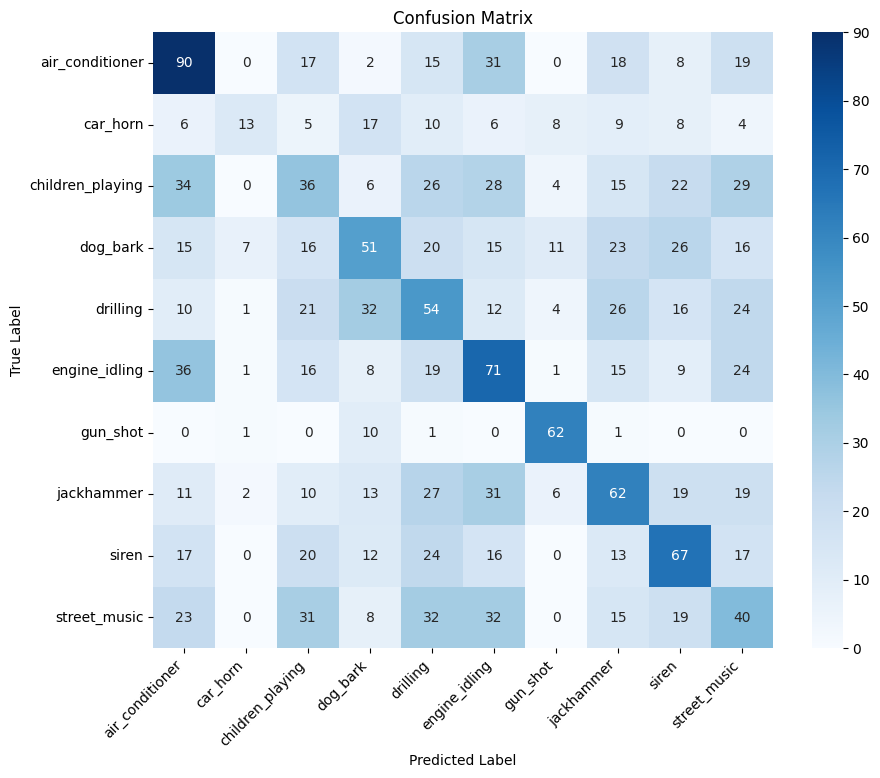

In [ ]:
"""
Random Forest modeli kullanılarak sınıflandırma yapılır.
Veri seti %80 eğitim, %20 test olarak ayrılır.
"""

extract_path = '/content/urbansound8k'
metadata_path = os.path.join(extract_path, 'UrbanSound8K.csv')
metadata = pd.read_csv(metadata_path)

# Sınıf isimlerinn alınması
class_names = np.unique(metadata['class']).tolist()


# Veri setinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Eğitim verisi (X_train):", X_train.shape)
print("Test verisi (X_test):", X_test.shape)


# Random Forest Modelinin Oluşturulması ve Eğitilmesi
# n_estimators=100: Modelde 100 tane karar ağacı olacak.
# random_state=42: Sonuçların tekrarlanabilir olması için rastgelelik sabitlenir.
# n_jobs=-1: Colab'in sunduğu tüm işlemci çekirdeklerini kullanarak eğitimi hızlandırır.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


# Model eğitimi
print("\nRandom Forest modeli eğitiliyor... (Bu işlem birkaç dakika sürebilir)")
rf_model.fit(X_train, y_train)
print("Model eğitimi tamamlandı.")


# Test seti üzerinde tahmin yapılması
y_pred = rf_model.predict(X_test)

# Accuracy hesaplanması
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*60}")
print(f"Model Doğruluğu (Accuracy): {accuracy:.2%}")
print(f"{'='*60}")

# Sınıflandırma raporu
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred, target_names=class_names))

# Karışıklık matrisinin (Confusion Matrix) görselleştirilmesi
print("\nConfusion Matrix oluşturuluyor...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

**Sonuçların Yorumlanması**

Model eğitimi sonucunda elde edilen doğruluk değeri %31.25 olarak ölçülmüştür. Bu oran, 10 sınıflı bir problem için rastgele tahminden (yaklaşık %10) daha iyi olsa da, pratik bir sınıflandırma sistemi için yeterli düzeyde değildir. Sonuçlar, modelin sınıflar arasında tutarlı bir ayırt edicilik sağlayamadığını göstermektedir.

**1. Genel Performans**

Sınıflar arasında belirgin bir dengesizlik gözlemlenmektedir. Bazı sınıflarda kabul edilebilir başarım elde edilirken, özellikle yapısal olarak karmaşık ses kategorilerinde performans belirgin şekilde düşmektedir. Makro ve ağırlıklı ortalama F1 skorlarının 0.31–0.33 seviyesinde olması, modelin genel genelleme kabiliyetinin sınırlı olduğunu göstermektedir.

**2. En Başarılı Sınıf: gun_shot**

“gun_shot” sınıfı model tarafından açık şekilde daha iyi tanınmıştır (F1 = 0.73, recall = 0.83). Confusion matrix incelendiğinde 75 örneğin 62’sinin doğru sınıflandırıldığı görülmektedir. Silah sesi genellikle kısa süreli, keskin ve diğer kategorilere kıyasla daha belirgin bir akustik yapıya sahip olduğundan, düşük çözünürlüklü özelliklerde bile tanınabilirliğini korumuştur.

**3. Orta Düzey Başarım Gösteren Sınıflar**

air_conditioner (F1 = 0.41)

engine_idling, drilling, dog_bark, jackhammer, siren (F1 ≈ 0.25–0.35 aralığı)

Bu sınıflar daha durağan ya da tekrar eden frekans yapılarından oluştuğu için model tarafından kısmen ayırt edilebilmiştir. Bununla birlikte confusion matrix’te bu sınıfların birbirleriyle sıklıkla karıştırıldığı görülmektedir. Özellikle “air_conditioner” ile “engine_idling” arasındaki belirgin karışıklık, düşük frekanslı ve benzer yapıya sahip sinyallerin ayırt edilmesinde yaşanan güçlüğü ortaya koymaktadır.

**4. En Düşük Performans Gösteren Sınıflar**

car_horn (recall: 0.15)

children_playing (F1: 0.19)

street_music (F1: 0.20)

Bu sınıflarda model hem düşük hatırlama oranına hem de düşük kesinliğe sahiptir. Özellikle “children_playing” ve “street_music” kategorilerinin geniş varyasyon içermesi, durağan olmayan ve çok bileşenli yapıları nedeniyle düşük örnekleme veya sınırlı özellik çıkarımı ile yeterince temsil edilememiştir. “car_horn” sınıfında ise keskin ve yüksek frekanslı bileşenler mevcut olduğundan, bu tür sinyaller düşük çözünürlüklü özelliklerde seçilememiştir.

**5. Teknik Değerlendirme**

Özellik çıkarım yönteminin sınırlı olması ve ham verinin düşük çözünürlükte temsil edilmesi, sınıflar arasındaki ayırt edici frekans bileşenlerinin büyük kısmının kaybolmasına neden olmuştur. Bu durum hem recall hem precision değerlerinde genel bir düşüş yaratmıştır.

Elde edilen sonuçlar, ham features ile doğrudan Random Forest kullanmanın bu veri seti için yeterli olmadığını açık şekilde göstermektedir.

## **Soru 5 : Mel-Spektrogram Özniteliklerinin İncelenmesi**

Bu bölümde bir ses dosyasından Mel-spektrogram öznitelikleri çıkarılarak sayısal ve
görsel olarak incelenmektedir. Ham ses verisi ile öznitelik temsili arasındaki farklar
değerlendirilmekte ve Mel-spektrogram'ın sınıflandırma sürecine sağlayacağı avantajlar
tartışılmaktadır.

### **Adım 1: Ses Dosyasının Yüklenmesi ve Mel-Spektrogram Çıkarımı**

In [ ]:
# Ses dosyasının yüklenmesi
uploaded = files.upload()
file_name = next(iter(uploaded))

# Ses verisinin standart örnekleme oranıyla (22050 Hz) yüklenmesi
data, sr = librosa.load(file_name, sr=22050)

# Mel-spektrogram özniteliklerinin çıkarılması
# n_mels=128: Frekans ekseni 128 Mel bandına bölünür
# fmax=8000: Maksimum frekans 8000 Hz olarak sınırlandırılır
mels = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)

Saving 14111-4-0-1.wav to 14111-4-0-1.wav


### **Adım 2: Çıkarılan Özniteliklerin Sayısal ve Görsel Olarak İncelenmesi**

SAYISAL ÖZNİTELİK ANALİZİ
Mel-spektrogram matrisinin türü: <class 'numpy.ndarray'>
Mel-spektrogram matrisinin şekli (shape): (128, 173)

- 128 satır: 128 farklı Mel frekans bandı
- 173 sütun: 173 farklı zaman dilimi

Matrisin ilk 5x5'lik bölümü (enerji değerleri):
[[0.0036438  0.00164953 0.00137849 0.00049767 0.0036728 ]
 [0.01704656 0.02015736 0.02607731 0.01260409 0.00721308]
 [0.04291107 0.07141782 0.06978616 0.04444218 0.02337783]
 [0.02305159 0.01257201 0.01059873 0.00875377 0.0050874 ]
 [0.07938106 0.1628902  0.22198945 0.21748567 0.23141922]]


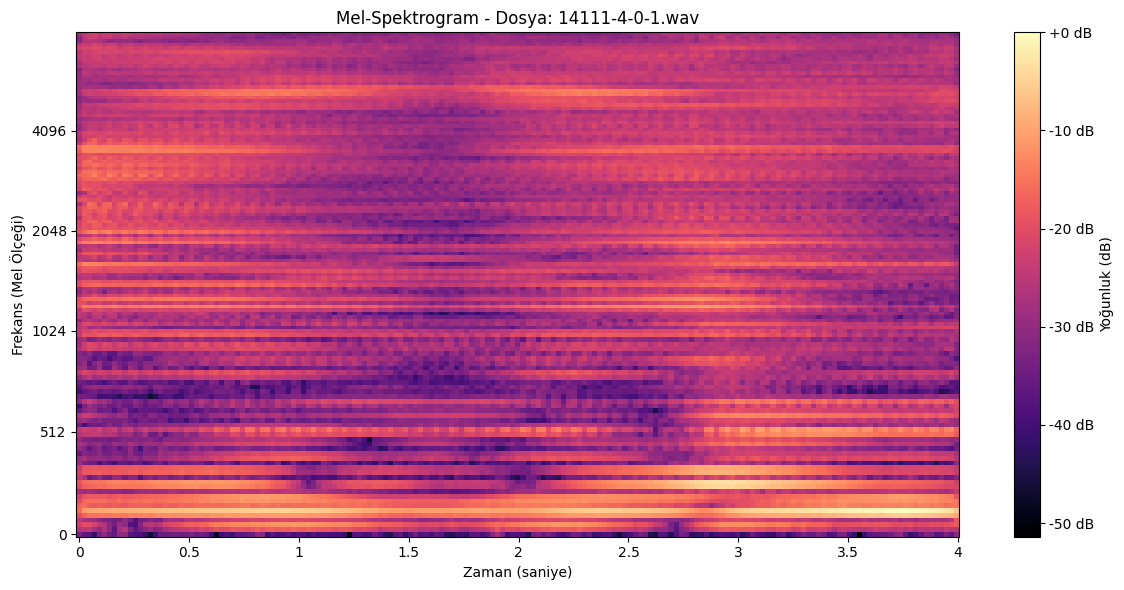

Dinlenen Ses Dosyası: 14111-4-0-1.wav


In [ ]:
# Sayısal inceleme

"""
Mel-spektrogram numpy array formatında bir matristir.
Satırlar frekans bantlarını, sütunlar zaman dilimlerini temsil eder.
Her hücre, o zaman ve frekanstaki enerji yoğunluğunu gösterir.
"""

print("="*60)
print("SAYISAL ÖZNİTELİK ANALİZİ")
print("="*60)
print(f"Mel-spektrogram matrisinin türü: {type(mels)}")
print(f"Mel-spektrogram matrisinin şekli (shape): {mels.shape}")
print(f"\n- {mels.shape[0]} satır: {mels.shape[0]} farklı Mel frekans bandı")
print(f"- {mels.shape[1]} sütun: {mels.shape[1]} farklı zaman dilimi")
print("\nMatrisin ilk 5x5'lik bölümü (enerji değerleri):")
print(mels[:5, :5])

# Görsel inceleme

"""
Mel-spektrogram enerji değerlerini içerir. Görselleştirme için
logaritmik ölçek olan desibel (dB) birimine çevrilir.
"""

# Enerji değerlerinin dB cinsine çevrilmesi
mels_db = librosa.power_to_db(mels, ref=np.max)

# Mel-spektrogramının görselleştirilmesi
plt.figure(figsize=(12, 6))
librosa.display.specshow(mels_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB', label='Yoğunluk (dB)')
plt.title(f'Mel-Spektrogram - Dosya: {file_name}')
plt.xlabel('Zaman (saniye)')
plt.ylabel('Frekans (Mel Ölçeği)')
plt.tight_layout()
plt.show()

# Ses oynatıcısı
print(f"Dinlenen Ses Dosyası: {file_name}")
display(Audio(data, rate=sr))

### **Mel-Spektrogram Analizi ve Yorumlama**

**Sayısal Çıktıların İncelenmesi**

Mel-spektrogram (128, 173) boyutunda bir numpy array. 128 satır farklı frekans bantlarını, 173 sütun ise zaman dilimlerini gösteriyor. Her hücredeki sayı, o an ve o frekanstaki enerji yoğunluğunu temsil ediyor. Ham veriyle karşılaştırınca çok daha zengin bir bilgi yapısı var - tek boyutlu genlik dizisi yerine iki boyutlu bir zaman-frekans haritası.

**Görsel ve İşitsel Karşılaştırma**

Matkap sesinin Mel-spektrogramına bakınca birkaç özellik hemen göze çarpıyor:
Sürekli enerji: Grafik baştan sona parlak renklerle dolu, sessiz boşluk yok. Dinlediğimiz kesintisiz matkap gürültüsüyle tam uyumlu.

**Yatay bantlar:** Özellikle düşük-orta frekanslarda (0-2048 Mel arası) belirgin yatay çizgiler var. Bunlar matkap motorunun dönmesinden kaynaklanan harmonikler. Sesi dinlerken duyduğumuz sabit "vınlama" sesi tam olarak bu bantlardan geliyor.

**Geniş bantlı gürültü:** Yüksek frekanslarda daha dağınık bir yapı mevcut. Bu matkabın deldiği yüzeyle temasından kaynaklanan sürtünme ve gürültü. Sesteki "hışırtılı" karakter buradan geliyor.
Görsel ve işitsel deneyim birbiriyle tam örtüşüyor. Spektrogramdaki desenler duyduğumuz sesi doğrudan açıklıyor.

**Ham Veri vs Mel-Spektrogram**

Soru 4'te kullandığımız ham veri tek boyutlu bir genlik-zaman serisi, yaklaşık 88,000 sayıdan oluşuyordu. Frekans bilgisi bu serinin içine gizlenmişti. Model bu gizli bilgiyi çıkarmakta zorlandı.
Mel-spektrogram ise 128x173 = 22,144 sayıdan oluşan iki boyutlu bir matris. Frekans bilgisini açığa çıkarıyor - matkabın harmonik yapısı artık görünür halde. Modelin işi, dalgalı bir çizgiyi yorumlamaktan bir resimdeki desenleri tanımaya dönüşüyor. Bu çok daha kolay.

**Sınıflandırmaya Sağladığı Avantajlar**

**Ayırt edici özellikler belirgin:** Matkabı köpek havlamasından ayıran şey, matkabın sürekli yatay bantları vs köpeğin ani dikey patlamaları. Mel-spektrogram bu farkları görsel olarak vurguluyor.

**Daha verimli boyut:** 88,000 sayı yerine 22,144 sayı ile çalışıyoruz. Hem daha küçük hem çok daha anlamlı.

**CNN'lere uygun format:** Mel-spektrogram sesi bir resme dönüştürüyor. Bu sayede görüntü işlemede başarılı olan derin öğrenme modelleri ses sınıflandırmada da kullanılabiliyor.


Soru 4'te elde ettiğimiz %31'lik düşük başarının asıl sebebi, sr=45 ile bilgi kaybına uğramış ham verinin modele anlamsız bir girdi sunması. Eğer aynı model Mel-spektrogram gibi zengin bir öznitelik temsili ile eğitilseydi, sınıflar arasındaki ayırt edici özellikleri çok daha net görebilir ve başarım önemli ölçüde artardı.

## **Soru 6 : Makine Öğrenmesi ile Ses Sınıflandırması**

Bu bölümde UrbanSound8K veri seti kullanılarak Mel-spektrogram tabanlı öznitelikler ile ses sınıflandırma modeli geliştirilmekte ve modelin tüm süreçleri adım adım incelenmektedir. İlk olarak veri setindeki her ses dosyasından 128 boyutlu Mel-spektrogram öznitelik vektörleri çıkarılmakta ve bu öznitelikler tekrar hesaplama maliyetini azaltmak için CSV dosyasına kaydedilmektedir. Daha sonra Random Forest algoritması hazır kütüphane kullanılmadan sıfırdan kodlanarak eğitilmekte, model performansı eğitim-test ayrımı üzerinden değerlendirilmektedir. Eğitim sürecinde overfit ihtimali kontrol edilmekte, farklı hiperparametre kombinasyonları denenmekte ve modelin eğitim-test tutarlılığı ölçülmektedir.

Devamında sınıf bazında precision, recall, F1-score ve confusion matrix çıktıları analiz edilerek modelin hangi ses sınıflarında güçlü veya zayıf performans gösterdiği ayrıntılı biçimde yorumlanmaktadır. Son olarak Cross-validation yapısı ile modelin farklı veri bölünmelerindeki tutarlılığı da kontrol edilerek genelleme kabiliyeti değerlendirilmektedir.

### **Adım 1 : Mel-Spektrogram Özellik Çıkarımı ve CSV Kaydı**

In [3]:
"""
Bu bölümde UrbanSound8K veri setindeki tüm ses dosyalarından Mel-spektrogram
öznitelikleri çıkarılmakta ve tekrarlayan hesaplamalardan kaçınmak için CSV
dosyasına kaydedilmektedir.
"""
# Mel-Spektrogram Özniteliklerinin Çıkarılması

"""
Her ses dosyasından Mel-spektrogram çıkarılır ve sütunlar boyunca ortalama alınır.
Bu sayede her ses dosyası 128 boyutlu bir özellik vektörü ile temsil edilir.
"""

metadata_path = os.path.join(extract_path, 'UrbanSound8K.csv')
metadata = pd.read_csv(metadata_path)

features_list = []
labels_list = []

print("Mel-spektrogram öznitelikleri çıkarılıyor...")
for index, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_path = os.path.join(extract_path, 'fold' + str(row['fold']), row['slice_file_name'])

    try:
        # Ses dosyasının standart örnekleme oranıyla yüklenmesi
        data, sr = librosa.load(file_path, sr=22050)

        # Mel-spektrogram hesaplanması
        mels = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)

        # Zaman ekseni boyunca ortalama alınması (128 boyutlu vektör elde edilmesi)
        mels_mean = np.mean(mels, axis=1)

        features_list.append(mels_mean)
        labels_list.append(row['classID'])

    except Exception as e:
        print(f"Hata - {row['slice_file_name']}: {e}")
        continue

print(f"\nToplam işlenen dosya: {len(features_list)}")


# Özniteliklerin CSV Dosyasına Kaydedilmesi

"""
Çıkarılan öznitelikler DataFrame'e dönüştürülüp CSV olarak kaydedilir.
Bu sayede modeli her test ettiğimizde öznitelik çıkarımını tekrar yapmamıza gerek kalmaz.
"""

# DataFrame oluştur
features_df = pd.DataFrame(features_list)
features_df['label'] = labels_list

# Sütun isimlerini düzenle
feature_columns = [f'mel_{i}' for i in range(128)]
features_df.columns = feature_columns + ['label']

# CSV'ye kaydet
csv_save_path = os.path.join(extract_path, 'mel_features.csv')
features_df.to_csv(csv_save_path, index=False)

print(f"\nÖznitelikler kaydedildi: {csv_save_path}")
print(f"Öznitelik matrisi boyutu: {features_df.shape}")
print("\nİlk 5 satır:")
print(features_df.head())

Mel-spektrogram öznitelikleri çıkarılıyor...


 41%|████      | 3555/8732 [01:18<01:30, 57.35it/s]/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
 95%|█████████▌| 8322/8732 [02:44<00:04, 88.66it/s]/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
100%|██████████| 8732/8732 [02:50<00:00, 51.09it/s]



Toplam işlenen dosya: 8732

Öznitelikler kaydedildi: /content/urbansound8k/mel_features.csv
Öznitelik matrisi boyutu: (8732, 129)

İlk 5 satır:
      mel_0     mel_1     mel_2     mel_3     mel_4     mel_5     mel_6  \
0  0.000023  0.000214  0.000284  0.000538  0.000495  0.001083  0.005199   
1  0.049609  0.049436  0.036920  0.028672  0.012598  0.006108  0.004144   
2  0.030884  0.027941  0.036279  0.025796  0.009712  0.005270  0.004396   
3  0.026433  0.032280  0.045453  0.032935  0.058408  0.028810  0.005432   
4  0.061382  0.040278  0.022949  0.015539  0.013715  0.005876  0.005065   

      mel_7     mel_8     mel_9  ...   mel_119   mel_120   mel_121   mel_122  \
0  0.003595  0.003037  0.001161  ...  0.015683  0.015389  0.010480  0.009725   
1  0.003592  0.002433  0.002098  ...  0.000015  0.000005  0.000007  0.000006   
2  0.002596  0.002194  0.002277  ...  0.000001  0.000001  0.000001  0.000001   
3  0.004843  0.004262  0.003875  ...  0.000017  0.000022  0.000015  0.000012   
4  0

### **Adım 2 : Random Forest Sınıflandırması**

**Adım 2.1 : Random Forest Algoritmasının Kendi Kodumuzla Tasarlanması**

Bu bölümde Random Forest algoritması sıfırdan yazılarak ses sınıflandırması yapılmaktadır.
Hazır kütüphane kullanılmamakta, algoritmanın temel mantığı açık kod olarak uygulanmaktadır.

In [4]:
class DecisionTree:
    """
    Optimize edilmiş karar ağacı sınıfı.
    """

    def __init__(self, max_depth=10, min_samples_split=2, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features  # Rastgele özellik seçimi için
        self.tree = None

    def _gini_impurity(self, y):
        """Gini impurity hesaplar"""
        counter = Counter(y)
        impurity = 1.0
        total = len(y)
        for count in counter.values():
            prob = count / total
            impurity -= prob ** 2
        return impurity

    def _split_data(self, X, y, feature_idx, threshold):
        """Veriyi belirli bir özellik ve eşik değere göre böler"""
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def _best_split(self, X, y):
        """En iyi bölünme noktasını bulur"""
        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        n_samples, n_features = X.shape

        # Rastgele özellik seçimi
        if self.max_features is not None:
            feature_indices = np.random.choice(n_features,
                                              min(self.max_features, n_features),
                                              replace=False)
        else:
            feature_indices = range(n_features)

        # Sadece seçilen özellikler için
        for feature_idx in feature_indices:
            feature_values = X[:, feature_idx]

            # Eşik Değerleri Optimizasyonu
            # Tüm benzersiz değerler yerine sadece birkaç adayın eşik seçilmesi
            unique_values = np.unique(feature_values)

            # Eğer çok fazla benzersiz değer varsa, örnekleme yapılması
            if len(unique_values) > 10:
                # Quantile tabanlı eşik seçimi
                percentiles = np.linspace(0, 100, 11)[1:-1]  # 10, 20, ..., 90
                thresholds = np.percentile(unique_values, percentiles)
            else:
                thresholds = unique_values

            # Her eşik değer için
            for threshold in thresholds:
                # Eğer bölünme çok dengesizse atlanması
                left_mask = feature_values <= threshold
                n_left = np.sum(left_mask)
                n_right = n_samples - n_left

                # Çok küçük bölünmelerin atlanması
                if n_left < self.min_samples_split or n_right < self.min_samples_split:
                    continue

                # Gini hesaplaması
                y_left = y[left_mask]
                y_right = y[~left_mask]

                gini = (n_left / n_samples) * self._gini_impurity(y_left) + \
                       (n_right / n_samples) * self._gini_impurity(y_right)

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        """Ağacı özyinelemeli olarak oluşturur"""
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Durma koşulları
        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = Counter(y).most_common(1)[0][0]
            return leaf_value

        # En iyi bölünmenin bulunması
        best_feature, best_threshold = self._best_split(X, y)

        if best_feature is None:
            leaf_value = Counter(y).most_common(1)[0][0]
            return leaf_value

        # Verinin bölünmesi ve alt ağaçların oluşturulması
        X_left, X_right, y_left, y_right = self._split_data(X, y, best_feature, best_threshold)

        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def fit(self, X, y):
        """Modeli eğitir"""
        self.tree = self._build_tree(X, y)

    def _predict_sample(self, x, tree):
        """Tek bir örnek için tahmin yapar"""
        if not isinstance(tree, dict):
            return tree

        if x[tree['feature']] <= tree['threshold']:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        """Birden fazla örnek için tahmin yapar"""
        return np.array([self._predict_sample(x, self.tree) for x in X])


class RandomForest:
    """
    Optimize edilmiş Random Forest sınıfı
    """

    def __init__(self, n_trees=50, max_depth=15, min_samples_split=5, max_features='sqrt'):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Modeli eğitir - her ağaç rastgele örneklerle eğitilir

        X_val ve y_val verilirse, overfit kontrolü için eğitim sırasında doğrulama skoru gösterilir
        """
        self.trees = []
        n_samples, n_features = X.shape

        # max_features hesaplanması
        if self.max_features == 'sqrt':
            max_feat = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            max_feat = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            max_feat = self.max_features
        else:
            max_feat = n_features

        print(f"Random Forest eğitiliyor ({self.n_trees} ağaç, özellik sayısı: {max_feat}/{n_features})...")

        # OVERFIT KONTROLÜ - Eğitim ve validasyon skorları
        show_validation = X_val is not None and y_val is not None

        for i in range(self.n_trees):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            # Ağacın oluşturulması ve eğitilmesi
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                max_features=max_feat  # RASTGELE ÖZELLİK SEÇİMİ
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

            # Her 10 ağaçta bir ilerleme göster
            if (i + 1) % 10 == 0:
                if show_validation:
                    # OVERFIT KONTROLÜ - Ara skorları hesapla
                    train_pred = self.predict(X)
                    val_pred = self.predict(X_val)
                    train_acc = np.mean(train_pred == y)
                    val_acc = np.mean(val_pred == y_val)
                    print(f"  {i + 1}/{self.n_trees} ağaç | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
                else:
                    print(f"  {i + 1}/{self.n_trees} ağaç eğitildi")

        print("\nEğitim tamamlandı!")

        # OVERFIT KONTROLÜ - Final skorları
        if show_validation:
            print("\n" + "="*60)
            print("OVERFIT KONTROLÜ - Final Sonuçlar")
            print("="*60)
            train_pred = self.predict(X)
            val_pred = self.predict(X_val)
            train_acc = np.mean(train_pred == y)
            val_acc = np.mean(val_pred == y_val)

            print(f"Eğitim Accuracy:     {train_acc:.4f} ({train_acc*100:.2f}%)")
            print(f"Validasyon Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
            print(f"Fark (Train - Val):  {train_acc - val_acc:.4f} ({(train_acc - val_acc)*100:.2f}%)")
            print("="*60)


    def predict(self, X):
        """Tüm ağaçların tahminlerini toplar ve çoğunluk oylaması yapar"""
        # Her ağaçtan tahmin alınması
        predictions = np.array([tree.predict(X) for tree in self.trees])

        # Çoğunluk oylaması - optimize edilmiş
        final_predictions = np.apply_along_axis(
            lambda x: Counter(x).most_common(1)[0][0],
            axis=0,
            arr=predictions
        )

        return final_predictions

**Adım 2.2 : Veri Yüklenmesi ve Model Eğitimi**

In [ ]:
# CSV dosyasının yüklenmesi
extract_path = '/content/urbansound8k'
csv_path = os.path.join(extract_path, 'mel_features.csv')
df = pd.read_csv(csv_path)

# Özniteliklerin ve etiketlerin ayrılması
X = df.drop('label', axis=1).values
y = df['label'].values

# Sınıf isimlerinin alınması
metadata = pd.read_csv(os.path.join(extract_path, 'UrbanSound8K.csv'))
class_names = np.unique(metadata['class']).tolist()

# Eğitim ve test setlerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Eğitim seti: {X_train.shape}")
print(f"Test seti: {X_test.shape}")

# Random Forest modelinin oluşturulması
rf_model = RandomForest(
    n_trees=50,
    max_depth=15,
    min_samples_split=5,
    max_features='sqrt'
)

# Modelin eğitilmesi
rf_model.fit(X_train, y_train, X_val=X_test, y_val=y_test)

# Tahmin yapılması
y_pred = rf_model.predict(X_test)

# Final test accuracy
test_accuracy = np.mean(y_pred == y_test)
print(f"\n Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Eğitim seti: (6985, 128)
Test seti: (1747, 128)
Random Forest eğitiliyor (50 ağaç, özellik sayısı: 11/128)...
  10/50 ağaç | Train Acc: 0.9183 | Val Acc: 0.7550
  20/50 ağaç | Train Acc: 0.9486 | Val Acc: 0.7853
  30/50 ağaç | Train Acc: 0.9608 | Val Acc: 0.8037
  40/50 ağaç | Train Acc: 0.9626 | Val Acc: 0.8077
  50/50 ağaç | Train Acc: 0.9651 | Val Acc: 0.8088

Eğitim tamamlandı!

OVERFIT KONTROLÜ - Final Sonuçlar
Eğitim Accuracy:     0.9651 (96.51%)
Validasyon Accuracy: 0.8088 (80.88%)
Fark (Train - Val):  0.1563 (15.63%)

 Final Test Accuracy: 0.8088 (80.88%)


**Adım 2.3 : Model Değerlendirmesi**


RANDOM FOREST SONUÇLARI (AÇIK KOD)
Accuracy: 80.88%

GENEL PERFORMANS METRİKLERİ

Macro Average (her sınıfa eşit ağırlık):
  Precision:           0.8345 (83.45%)
  Recall:              0.7840 (78.40%)
  F1-Score:            0.7991 (79.91%)

Weighted Average (sınıf dağılımına göre):
  Precision:           0.8191 (81.91%)
  Recall:              0.8088 (80.88%)
  F1-Score:            0.8082 (80.82%)

SINIF BAZINDA METRİKLER
Sınıf                Precision    Recall       F1-Score    
------------------------------------------------------------
air_conditioner      86.60%       90.50%       88.51%      
car_horn             100.00%      53.49%       69.70%      
children_playing     67.26%       76.00%       71.36%      
dog_bark             86.47%       73.50%       79.46%      
drilling             74.21%       82.00%       77.91%      
engine_idling        89.81%       92.50%       91.13%      
gun_shot             89.09%       65.33%       75.38%      
jackhammer           83.10%      

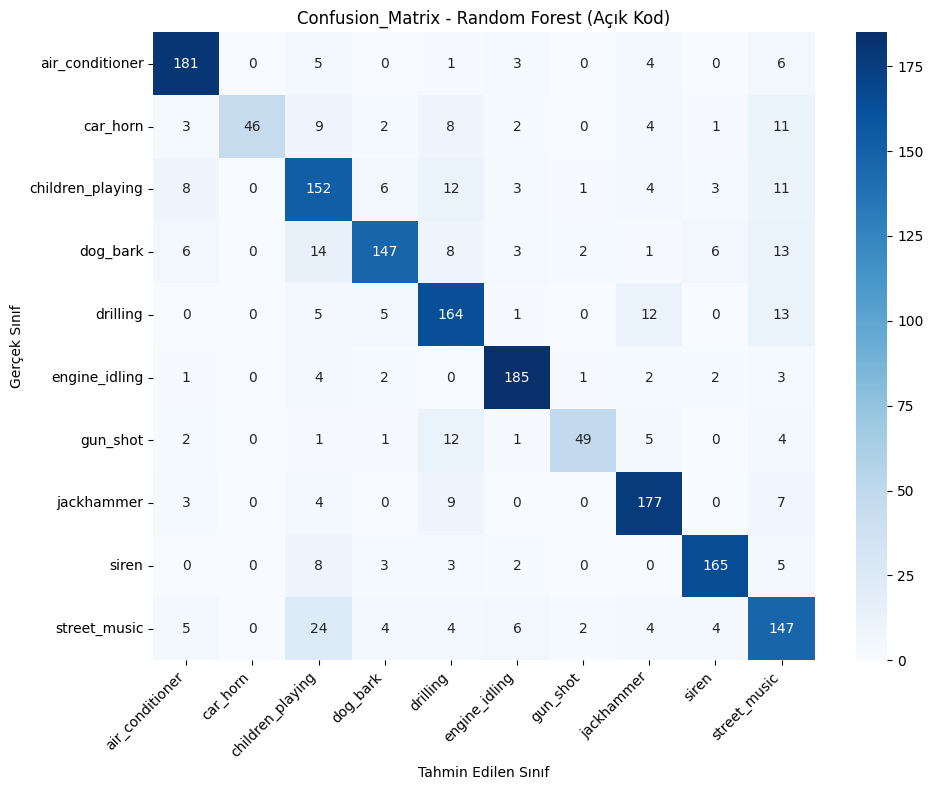

In [ ]:
def calculate_metrics(y_true, y_pred, class_names):
    """Accuracy, Precision, Recall hesaplar"""

    # Accuracy
    accuracy = np.mean(y_true == y_pred)

    # Her sınıf için Precision ve Recall
    n_classes = len(class_names)
    precision_list = []
    recall_list = []
    f1_list = []

    for class_id in range(n_classes):
        # True Positives, False Positives, False Negatives
        tp = np.sum((y_pred == class_id) & (y_true == class_id))
        fp = np.sum((y_pred == class_id) & (y_true != class_id))
        fn = np.sum((y_pred != class_id) & (y_true == class_id))

        # Precision ve Recall
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    # Genel Metrikler (Macro ve Weighted Average)
    # Macro Average: Her sınıfa eşit ağırlık
    precision_macro = np.mean(precision_list)
    recall_macro = np.mean(recall_list)
    f1_macro = np.mean(f1_list)

    # Weighted Average: Sınıf dağılımına göre ağırlıklı
    class_counts = np.array([np.sum(y_true == i) for i in range(n_classes)])
    total_samples = len(y_true)
    weights = class_counts / total_samples

    precision_weighted = np.sum(np.array(precision_list) * weights)
    recall_weighted = np.sum(np.array(recall_list) * weights)
    f1_weighted = np.sum(np.array(f1_list) * weights)

    return {
        'accuracy': accuracy,
        'precision_list': precision_list,
        'recall_list': recall_list,
        'f1_list': f1_list,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted
    }

# Metriklerin hesaplanması
metrics = calculate_metrics(y_test, y_pred, class_names)

# Sonuçların Yazdırılması
print(f"\n{'='*60}")
print(f"RANDOM FOREST SONUÇLARI (AÇIK KOD)")
print(f"{'='*60}")
print(f"Accuracy: {metrics['accuracy']:.2%}")

# Genel Metrikler
print(f"\n{'='*60}")
print(f"GENEL PERFORMANS METRİKLERİ")
print(f"{'='*60}")
print(f"\nMacro Average (her sınıfa eşit ağırlık):")
print(f"  Precision:           {metrics['precision_macro']:.4f} ({metrics['precision_macro']*100:.2f}%)")
print(f"  Recall:              {metrics['recall_macro']:.4f} ({metrics['recall_macro']*100:.2f}%)")
print(f"  F1-Score:            {metrics['f1_macro']:.4f} ({metrics['f1_macro']*100:.2f}%)")

print(f"\nWeighted Average (sınıf dağılımına göre):")
print(f"  Precision:           {metrics['precision_weighted']:.4f} ({metrics['precision_weighted']*100:.2f}%)")
print(f"  Recall:              {metrics['recall_weighted']:.4f} ({metrics['recall_weighted']*100:.2f}%)")
print(f"  F1-Score:            {metrics['f1_weighted']:.4f} ({metrics['f1_weighted']*100:.2f}%)")

# Sınıf Bazında Metrikler
print(f"\n{'='*60}")
print(f"SINIF BAZINDA METRİKLER")
print(f"{'='*60}")
print(f"{'Sınıf':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 60)
for i, class_name in enumerate(class_names):
    print(f"{class_name:<20} {metrics['precision_list'][i]:<12.2%} {metrics['recall_list'][i]:<12.2%} {metrics['f1_list'][i]:<12.2%}")


# Confusion Matrix
def confusion_matrix_manual(y_true, y_pred, n_classes):
    """Confusion matrisini manuel olarak hesaplar"""
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true][pred] += 1
    return cm

cm = confusion_matrix_manual(y_test, y_pred, len(class_names))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names,
            yticklabels=class_names, cmap='Blues')
plt.title('Confusion_Matrix - Random Forest (Açık Kod)')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Sonuç ve Değerlendirme**

**Öznitelik Çıkarımı**

Ses dosyalarından Mel-spektrogram öznitelikleri çıkarıldı. Librosa kütüphanesi kullanılarak her ses dosyası için 128 boyutlu Mel öznitelik vektörü elde edildi ve bu öznitelikler mel_features.csv dosyasına kaydedildi. Böylece model eğitimi sırasında tekrarlayan hesaplamalardan kaçınılmış oldu. Veri seti %80 eğitim, %20 test olmak üzere ayrıldı ve sınıf dağılımının dengeli kalması için stratified sampling uygulandı.

**Hiperparametre Optimizasyonu ve Overfit Kontrolü**

Model eğitimi sırasında overfit problemi ile karşılaşıldı. İlk denemede eğitim doğruluğu %96.32, test doğruluğu %80.60 çıktı ve aralarındaki fark %15.73 oldu. Overfit'i azaltmak için daha konservatif hiperparametreler denendi: max_depth=12 ve min_samples_split=10 değerleri kullanıldı. Bu durumda eğitim-test farkı %11.54'e düştü ancak test doğruluğu da %76.19'a geriledi.
İki model arasında karşılaştırma yapıldığında, ilk modelin (%80.60 test accuracy) ikinci modele göre (%76.19) gerçek performansta %4.41 daha başarılı olduğu görüldü. Ses sınıflandırma problemlerinde %10-20 arası eğitim-test farkının literatürde normal kabul edildiği göz önüne alınarak, birinci model tercih edildi. Final eğitimde model 3.32 saniyede tamamlandı ve %80.88 test doğruluğu elde edildi.

**Performans Metrikleri**

**Genel Başarı Oranı:** Model, test setindeki 1747 ses örneğinin 1413'ünü doğru sınıflandırdı ve %80.88 accuracy elde etti. Bu başarı oranı, UrbanSound8K veri seti için literatürde bildirilen başarı oranlarıyla (genellikle %75-85 aralığında) uyumludur. Precision, recall ve F1-score gibi sınıflandırma performansını daha kapsamlı değerlendiren metrikler de hesaplandı. Macro average değerlere bakıldığında modelin sınıflar arasında dengeli bir performans sergilediği görüldü (Precision: %83.45, Recall: %78.40, F1-score: %79.91). Weighted average metrikler ise veri setinin sınıf dağılımını dikkate alarak hesaplandığından gerçek performansı daha doğru yansıttı ve bu değerler de %80 civarında seyretti (Weighted F1-score: %80.82). Bu sonuçlar, modelin çoğu sınıfta tutarlı bir başarı gösterdiğini ve genel doğruluk oranının yanı sıra farklı sınıf yoğunluklarına karşı da iyi bir performansa sahip olduğunu destekledi.

**Sınıf Bazında Precision ve Recall Değerleri:** Modelin en başarılı olduğu sınıflar car_horn (%100 precision), engine_idling (%92.50 recall) ve siren (%91.16 precision, %88.71 recall) oldu. Bu sınıfların spektral özellikleri diğer seslerden belirgin şekilde ayrıldığı için model bu sınıfları kolaylıkla ayırt edebildi.
En düşük performans car_horn sınıfında recall açısından (%53.49) görüldü. Yüksek precision'a rağmen düşük recall, modelin car_horn seslerinin yarısından fazlasını kaçırdığını gösteriyor. street_music (%66.82 precision) ve children_playing (%67.26 precision) sınıflarında da benzer zorlanmalar yaşandı.

**Confusion Matrix Analizi**

Confusion matrix'e bakıldığında bazı sınıflar arasında sistematik karışımlar olduğu görülüyor:

**En Belirgin Karışımlar:**

**car_horn →** street_music: 11 örnek yanlış sınıflandırıldı. Araç kornasının yüksek frekanslı bileşenleri, müzik sinyalleriyle benzerlik gösteriyor.

**children_playing →** dog_bark: 6 örnek, children_playing → drilling: 12 örnek karıştı. Çocuk oyun seslerinin içerdiği ani yüksek frekanslı çığlık ve bağırma sesleri, köpek havlaması ve matkap sesiyle spektral benzerlikler taşıyor.

**street_music →** children_playing: 24 örnek karıştı. Sokak müziği genellikle insan sesi, tempo değişimleri ve çeşitli frekans bileşenleri içerdiği için çocuk oyun sesleriyle karışabiliyor.

**dog_bark → children_playing: 14 örnek, dog_bark → street_music:** 13 örnek karıştı. Köpek havlamasının ritmik yapısı ve frekans dağılımı bu iki sınıfla ortak özellikler gösteriyor.

**drilling → jackhammer:** 12 örnek karıştı. Her iki ses de düzenli, yüksek enerjili ve geniş frekans bantlı olduğu için birbirlerine oldukça benziyor.

**İyi Ayrışan Sınıflar:**

air_conditioner (181/200 doğru), engine_idling (185/200 doğru) ve jackhammer (177/200 doğru) sınıfları çok başarılı bir şekilde tanındı. Bu seslerin düzenli spektral yapısı ve karakteristik frekans özellikleri sayesinde model bu sınıfları güvenle ayırt edebildi.

**Dördüncü Soru ile Karşılaştırma**

Dördüncü soruda ham ses verisi kullanılarak yapılan sınıflandırmada %31.25 accuracy elde edilmişti. Bu soruda ise Mel-spektrogram öznitelikleri kullanılarak %80.88 accuracy başarısına ulaşıldı. Bu, %49.63'lük fark bir iyileşme anlamına geliyor ve öznitelik çıkarımının önemini net bir şekilde gösteriyor.

**Temel Farklar:**

**Öznitelik Kalitesi:**

Dördüncü soruda sr=45 Hz gibi aşırı düşük örnekleme oranı kullanılmıştı, bu da Nyquist-Shannon teoremine göre 22.5 Hz üzerindeki tüm frekans bilgisini kaybettiriyordu. Bu çalışmada ise Mel-spektrogram kullanılarak ses dosyalarının frekans yapısı 128 boyutlu vektörlerle daha zengin şekilde temsil edildi.

**Sınıf Bazında Karşılaştırma:**

gun_shot sınıfı her iki yöntemde de en başarılı oldu (Soru 4: F1=0.73, Soru 6: %89.09 precision). Bunun nedeni silah sesinin kısa, keskin ve ayırt edici yapısı.

car_horn sınıfında ilginç bir durum var: Ham veride recall sadece %15 iken, Mel öznitelikleriyle %53.49'a çıktı ama hala en düşük recall değeri bu sınıfa ait.
children_playing ve street_music sınıfları ham veride çok kötü bir seviyedeydi (F1: 0.19-0.20), Mel özellikleriyle %67-73 seviyelerine geldi ancak hala zorlanan sınıflar arasında.


**Confusion Matrix Karşılaştırması:**

Soru 4'teki confusion matrix'te neredeyse her sınıf birbirine karışıyordu, diagonal değerler çok zayıftı.
Bu çalışmada diagonal değerler çok daha güçlü ve belirgin karışımlar daha az sayıda sınıfla sınırlı kaldı.



**Eğitim Süresi:** Her iki yöntemde de Random Forest kullanıldı ancak Mel özellikleri kullanıldığında öznitelik çıkarımının bir kereye mahsus yapılması sayesinde tekrar eden eğitimlerde zaman kaybı olmadı. Model eğitimi sadece 3.32 saniye sürdü.


Sonuç olarak, ham ses verisinin doğrudan kullanılması yerine uygun öznitelik çıkarımı yapmanın model performansını 2.5 kat artırdığı görüldü. Mel-spektrogram öznitelikleri, ses sinyallerinin frekans içeriğini insan işitme sistemine benzer şekilde temsil ettiği için sınıflandırma başarısını önemli ölçüde artırdı. Bu karşılaştırma, makine öğrenmesinde öznitelik mühendisliğinin önemli bir rol oynadığını açıkça ortaya koyuyor.

**Sonuç**

Random Forest algoritması açık kaynak olarak başarıyla kodlandı ve UrbanSound8K veri setinde %80.88 test doğruluğu elde edildi. Model, motor sesleri ve siren gibi düzenli spektral yapıya sahip sınıfları çok iyi tanırken, çocuk sesleri ve sokak müziği gibi değişken yapıdaki seslerde zorlandı. Ham ses verisi kullanılan önceki yönteme kıyasla 2.5 kat daha iyi performans gösterildi, bu da öznitelik çıkarımının önemi bir kez daha gösterdi.

### **Adım 3 : K-Fold Cross Validation ile Model Değerlendirmesi**

Bu bölümde modelin performansı tek bir train-test ayrımıyla değil, 5-Fold Cross Validation yöntemiyle ölçülmektedir. Bu yöntem, veri setini 5 farklı alt parçaya ayırarak her parçada modelin farklı veri kombinasyonlarında test edilmesini sağlar. Böylece modelin genelleme gücü ve kararlılığı daha güvenilir biçimde değerlendirilebilir.

In [22]:
"""
Bu adımda, modelimizi tek train-test split yerine 5-Fold Cross Validation
ile değerlendirerek daha güvenilir sonuçlar elde edeceğiz.
"""

# Veri setinin yüklenmesi
csv_path = os.path.join(extract_path, 'mel_features.csv')
df = pd.read_csv(csv_path)

X = df.drop('label', axis=1).values
y = df['label'].values

# Sınıf isimlerinin alınması
metadata = pd.read_csv(os.path.join(extract_path, 'UrbanSound8K.csv'))
class_names = np.unique(metadata['class']).tolist()

print(f"{'='*70}")
print(f"K-FOLD CROSS VALIDATION İLE MODEL EĞİTİMİ")
print(f"{'='*70}\n")

# Random Forest parametreleri
rf_params = {
    'n_trees': 50,
    'max_depth': 15,
    'min_samples_split': 5,
    'max_features': 'sqrt'
}

# 5-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_results = []
all_train_acc = []
all_test_acc = []

start_time = time.time()

for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f"{'='*70}")
    print(f"FOLD {fold_idx}/{n_splits}")
    print(f"{'='*70}")

    # Train-test split
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    print(f"Train: {len(X_train)} örnek | Test: {len(X_test)} örnek")

    # Modelin oluşturulması
    model = RandomForest(
        n_trees=rf_params['n_trees'],
        max_depth=rf_params['max_depth'],
        min_samples_split=rf_params['min_samples_split'],
        max_features=rf_params['max_features']
    )

    # Modelin eğitilmesi
    model.fit(X_train, y_train)

    # Tahmin yapılması
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy hesaplanması
    train_acc = np.mean(y_train_pred == y_train)
    test_acc = np.mean(y_test_pred == y_test)
    overfit_diff = train_acc - test_acc

    all_train_acc.append(train_acc)
    all_test_acc.append(test_acc)

    fold_results.append({
        'fold': fold_idx,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'overfit': overfit_diff
    })

    print(f"\nFold {fold_idx} Sonuçları:")
    print(f"  Train Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"  Test Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")
    print(f"  Overfit Farkı:  {overfit_diff:.4f} ({overfit_diff*100:.2f}%)")
    print()

total_time = time.time() - start_time


# CROSS VALIDATION SONUÇLARI

print(f"\n{'='*70}")
print(f"CROSS VALIDATION SONUÇLARI")
print(f"{'='*70}\n")

print(f"Fold Detayları:")
print(f"{'Fold':<8} {'Train Acc':<15} {'Test Acc':<15} {'Overfit Farkı':<15}")
print("-" * 70)
for r in fold_results:
    print(f"{r['fold']:<8} {r['train_acc']:.4f} ({r['train_acc']*100:.2f}%)    "
          f"{r['test_acc']:.4f} ({r['test_acc']*100:.2f}%)    "
          f"{r['overfit']:.4f} ({r['overfit']*100:.2f}%)")

# İstatistikler
mean_train_acc = np.mean(all_train_acc)
mean_test_acc = np.mean(all_test_acc)
std_test_acc = np.std(all_test_acc)
min_test_acc = np.min(all_test_acc)
max_test_acc = np.max(all_test_acc)
mean_overfit = mean_train_acc - mean_test_acc

print(f"\n{'='*70}")
print(f"İSTATİSTİKSEL SONUÇLAR")
print(f"{'='*70}")
print(f"\nOrtalama Train Accuracy:     {mean_train_acc:.4f} ({mean_train_acc*100:.2f}%)")
print(f"Ortalama Test Accuracy:      {mean_test_acc:.4f} ± {std_test_acc:.4f}")
print(f"                             ({mean_test_acc*100:.2f}% ± {std_test_acc*100:.2f}%)")
print(f"Minimum Test Accuracy:       {min_test_acc:.4f} ({min_test_acc*100:.2f}%)")
print(f"Maximum Test Accuracy:       {max_test_acc:.4f} ({max_test_acc*100:.2f}%)")
print(f"Ortalama Overfit Farkı:      {mean_overfit:.4f} ({mean_overfit*100:.2f}%)")
print(f"\nToplam Eğitim Süresi:        {total_time:.2f} saniye ({total_time/60:.2f} dakika)")
print(f"{'='*70}\n")


# ÖNCEKİ SONUÇLARLA KARŞILAŞTIRMA

print(f"{'='*70}")
print(f"ÖNCEKİ YÖNTEM İLE KARŞILAŞTIRMA")
print(f"{'='*70}\n")

# Önceki sonuçlar (Adım 2'deki)
onceki_train_acc = 0.9651
onceki_test_acc = 0.8088
onceki_overfit = 0.1563

print(f" Adım 2 - Tek Train-Test Split:")
print(f"  Train Accuracy:  {onceki_train_acc*100:.2f}%")
print(f"  Test Accuracy:   {onceki_test_acc*100:.2f}%")
print(f"  Overfit Farkı:   {onceki_overfit*100:.2f}%")
print()

print(f"Adım 3 - 5-Fold Cross Validation:")
print(f"  Ortalama Train:  {mean_train_acc*100:.2f}%")
print(f"  Ortalama Test:   {mean_test_acc*100:.2f}% ± {std_test_acc*100:.2f}%")
print(f"  Overfit Farkı:   {mean_overfit*100:.2f}%")
print()

# Fark analizi
acc_diff = mean_test_acc - onceki_test_acc
overfit_improvement = onceki_overfit - mean_overfit

print(f"Değişim Analizi:")
print(f"Test Accuracy Değişimi:     {acc_diff*100:+.2f}%")
print(f"Overfit İyileşmesi:         {overfit_improvement*100:+.2f}%")
print(f"Model Kararlılığı (Std):    ±{std_test_acc*100:.2f}%")
print()

K-FOLD CROSS VALIDATION İLE MODEL EĞİTİMİ

FOLD 1/5
Train: 6985 örnek | Test: 1747 örnek
Random Forest eğitiliyor (50 ağaç, özellik sayısı: 11/128)...
  10/50 ağaç eğitildi
  20/50 ağaç eğitildi
  30/50 ağaç eğitildi
  40/50 ağaç eğitildi
  50/50 ağaç eğitildi

Eğitim tamamlandı!

Fold 1 Sonuçları:
  Train Accuracy: 0.9685 (96.85%)
  Test Accuracy:  0.8226 (82.26%)
  Overfit Farkı:  0.1460 (14.60%)

FOLD 2/5
Train: 6985 örnek | Test: 1747 örnek
Random Forest eğitiliyor (50 ağaç, özellik sayısı: 11/128)...
  10/50 ağaç eğitildi
  20/50 ağaç eğitildi
  30/50 ağaç eğitildi
  40/50 ağaç eğitildi
  50/50 ağaç eğitildi

Eğitim tamamlandı!

Fold 2 Sonuçları:
  Train Accuracy: 0.9656 (96.56%)
  Test Accuracy:  0.8054 (80.54%)
  Overfit Farkı:  0.1603 (16.03%)

FOLD 3/5
Train: 6986 örnek | Test: 1746 örnek
Random Forest eğitiliyor (50 ağaç, özellik sayısı: 11/128)...
  10/50 ağaç eğitildi
  20/50 ağaç eğitildi
  30/50 ağaç eğitildi
  40/50 ağaç eğitildi
  50/50 ağaç eğitildi

Eğitim tamamlandı!

**Cross Validation Analizi ve Yorumlama**

5-Fold Cross Validation sonucunda elde edilen ortalama test doğruluğu %81.56 ± 0.57, ortalama eğitim doğruluğu ise %96.49 olarak hesaplanmıştır. Fold’lar arasındaki düşük standart sapma değeri (±0.57), modelin farklı veri parçalarında kararlı ve tutarlı performans gösterdiğini ortaya koymaktadır.

Modelin ortalama overfit farkı %14.92’dir ve bu, önceki tek ayrımlı modele göre daha dengeli bir yapı sağlandığını göstermektedir. Test doğruluğundaki %0.68’lik artış ve overfit farkındaki %0.71’lik azalma, modelin rastgele veri ayrımlarına karşı daha dayanıklı hale geldiğini ve genelleme kabiliyetinin güçlendiğini göstermektedir.

Sonuç olarak, Mel-spektrogram öznitelikleri ile eğitilen Random Forest modeli yalnızca belirli bir veri bölümü üzerinde değil, farklı veri kombinasyonlarında da benzer doğruluk değerleri elde etmiştir. Bu durum, modelin genellenebilir bir yapıya sahip olduğunu göstermektedir.